In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-load-forecasting/train_dataframes.xlsx
/kaggle/input/electricity-load-forecasting/continuous dataset.csv
/kaggle/input/electricity-load-forecasting/test_dataframes.xlsx
/kaggle/input/electricity-load-forecasting/weekly pre-dispatch forecast.csv


In [179]:
import numpy as np
import pandas as pd
df=pd.read_csv('../input/electricity-load-forecasting/continuous dataset.csv')
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [180]:
#Template------Priyobroto Acharya---------Jadavpur University-----------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.svm import SVC
import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nat_demand,48048.0,1182.868647,192.068896,85.192500,1020.056900,1168.427700,1327.563950,1754.882000
T2M_toc,48048.0,27.399111,1.675462,22.953455,26.160455,27.118051,28.558344,35.039575
QV2M_toc,48048.0,0.018313,0.001607,0.012054,0.017236,0.018590,0.019521,0.022690
TQL_toc,48048.0,0.079979,0.065589,0.000000,0.026451,0.065201,0.117310,0.521240
W2M_toc,48048.0,13.391049,7.295502,0.008979,7.544958,12.182103,18.661282,39.229726
T2M_san,48048.0,26.921023,3.018129,19.765222,24.769281,26.167352,28.712335,39.063440
QV2M_san,48048.0,0.017844,0.001889,0.010247,0.016584,0.018351,0.019242,0.022165
TQL_san,48048.0,0.106265,0.086293,0.000009,0.036819,0.085968,0.157288,0.484985
W2M_san,48048.0,7.046675,4.103711,0.060394,3.955051,5.992762,9.409871,24.483937
T2M_dav,48048.0,24.719513,2.414019,19.933740,22.954652,24.001718,26.243402,34.216211


In [109]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

<Axes: >

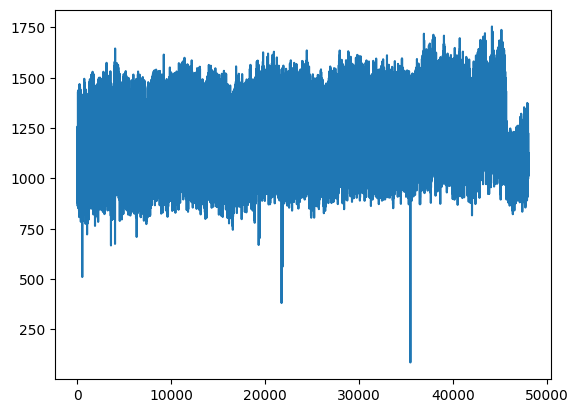

In [6]:
df["nat_demand"].plot()

In [7]:
df['nat_demand'].value_counts()

nat_demand
1003.9806    2
1002.4377    2
973.8241     2
927.7455     2
956.2212     2
            ..
1186.5096    1
1218.7356    1
1197.0691    1
1153.4618    1
1013.5683    1
Name: count, Length: 47909, dtype: int64

In [181]:
import pandas as pd

# Convert the datetime column to pandas datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract date and time related columns
df['date_year'] = df['datetime'].dt.year
df['date_month_no'] = df['datetime'].dt.month
df['date_day'] = df['datetime'].dt.day
df['date_is_weekend'] = (df['datetime'].dt.weekday >= 5).astype(int)  # Convert boolean to int (0 or 1)
df['date_week'] = df['datetime'].dt.isocalendar().week
df['hour'] = df['datetime'].dt.hour
df['min'] = df['datetime'].dt.minute
df['sec'] = df['datetime'].dt.second

df


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,holiday,school,date_year,date_month_no,date_day,date_is_weekend,date_week,hour,min,sec
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,...,0,0,2015,1,3,1,1,1,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,...,0,0,2015,1,3,1,1,2,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,...,0,0,2015,1,3,1,1,3,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,...,0,0,2015,1,3,1,1,4,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,...,0,0,2015,1,3,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,...,0,1,2020,6,26,0,26,20,0,0
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,...,0,1,2020,6,26,0,26,21,0,0
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,...,0,1,2020,6,26,0,26,22,0,0
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,...,0,1,2020,6,26,0,26,23,0,0


In [236]:
train_df=df

In [237]:
train_df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,holiday,school,date_year,date_month_no,date_day,date_is_weekend,date_week,hour,min,sec
0,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,...,0,0,2015,1,3,1,1,1,0,0
1,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,...,0,0,2015,1,3,1,1,2,0,0
2,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,...,0,0,2015,1,3,1,1,3,0,0
3,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,...,0,0,2015,1,3,1,1,4,0,0
4,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,...,0,0,2015,1,3,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,...,0,1,2020,6,26,0,26,20,0,0
48044,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,...,0,1,2020,6,26,0,26,21,0,0
48045,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,...,0,1,2020,6,26,0,26,22,0,0
48046,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,...,0,1,2020,6,26,0,26,23,0,0


In [238]:
X = train_df.drop(columns=['nat_demand'])
y = train_df['nat_demand']


In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [239]:
X_train

,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,...,holiday,school,date_year,date_month_no,date_day,date_is_weekend,date_week,hour,min,sec
39623,26.576105,0.019807,0.072357,7.493484,25.216730,0.019303,0.110138,4.411643,23.372980,0.018159,...,0,1,2019,7,12,0,28,0,0,0
26601,27.416406,0.017600,0.130493,21.617335,26.900781,0.018088,0.187439,9.203218,23.783594,0.017493,...,0,0,2018,1,15,0,3,10,0,0
28871,27.030908,0.019511,0.052368,20.961102,25.843408,0.018122,0.057312,8.439482,23.921533,0.017298,...,0,1,2018,4,20,0,16,0,0,0
16293,26.234033,0.019744,0.077423,8.287791,25.304346,0.019767,0.155518,6.606283,23.171533,0.018257,...,0,1,2016,11,11,0,45,22,0,0
12668,27.437250,0.020119,0.103302,6.087760,26.124750,0.020447,0.248962,5.641792,24.124750,0.018799,...,0,1,2016,6,13,0,24,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26.456934,0.018083,0.019562,11.721672,24.910059,0.016847,0.017899,3.194772,22.925684,0.016351,...,0,1,2016,4,17,1,15,5,0,0
44732,26.225641,0.017272,0.013802,22.460305,23.678766,0.014850,0.021988,11.080551,22.124078,0.014541,...,0,0,2020,2,9,1,6,21,0,0
38158,26.764520,0.018792,0.008003,10.857207,26.295770,0.018846,0.053162,1.314561,23.858270,0.018037,...,0,1,2019,5,11,1,19,23,0,0
860,25.460077,0.015478,0.001777,17.211835,24.811639,0.015322,0.055862,9.288972,22.522577,0.015066,...,0,0,2015,2,7,1,6,21,0,0


In [240]:
y_train

39623    1113.3099
26601    1397.1628
28871    1160.9232
16293    1066.5749
12668    1210.1754
           ...    
11284     935.3807
44732    1251.3930
38158    1156.9696
860      1039.5453
15795     906.9531
Name: nat_demand, Length: 38438, dtype: float64

In [241]:
X_test

,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,...,holiday,school,date_year,date_month_no,date_day,date_is_weekend,date_week,hour,min,sec
45068,25.070886,0.015014,0.001614,22.384582,24.641199,0.014667,0.012634,12.324900,22.656824,0.014251,...,1,0,2020,2,23,1,8,21,0,0
15200,27.643365,0.018823,0.177063,3.140293,28.518365,0.018373,0.141846,1.153303,24.799615,0.017633,...,0,1,2016,9,27,0,39,9,0,0
17210,25.381799,0.018265,0.054886,18.067061,22.545862,0.016441,0.032028,6.459642,22.225549,0.015861,...,0,0,2016,12,20,0,51,3,0,0
30002,26.480127,0.020472,0.093414,7.074711,24.839502,0.019091,0.117645,4.520269,23.097314,0.018061,...,0,0,2018,6,6,0,23,3,0,0
18911,25.713800,0.015933,0.012634,23.044415,24.955988,0.016657,0.057083,9.564726,22.698175,0.015563,...,1,0,2017,3,1,0,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,27.093439,0.015946,0.006132,21.323690,26.812189,0.016831,0.033478,4.944891,25.484064,0.016487,...,0,0,2016,2,4,0,5,18,0,0
43187,28.496271,0.019176,0.282104,10.571214,28.754083,0.017863,0.173523,2.147735,25.754083,0.016864,...,0,1,2019,12,7,1,49,12,0,0
11690,25.941095,0.018923,0.045837,7.914815,24.737970,0.018587,0.064331,3.549464,23.347345,0.017802,...,0,1,2016,5,4,0,18,3,0,0
45782,31.403467,0.014563,0.000799,22.083046,36.325342,0.012259,0.020248,10.917464,31.200342,0.013815,...,0,1,2020,3,24,0,13,15,0,0


In [242]:
y_test

45068    1124.5630
15200    1325.5949
17210     969.1594
30002     998.7269
18911     943.5333
           ...    
9545     1228.9328
43187    1392.0543
11690     944.7045
45782    1170.3642
7945      909.8799
Name: nat_demand, Length: 9610, dtype: float64

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
import tensorflow
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense

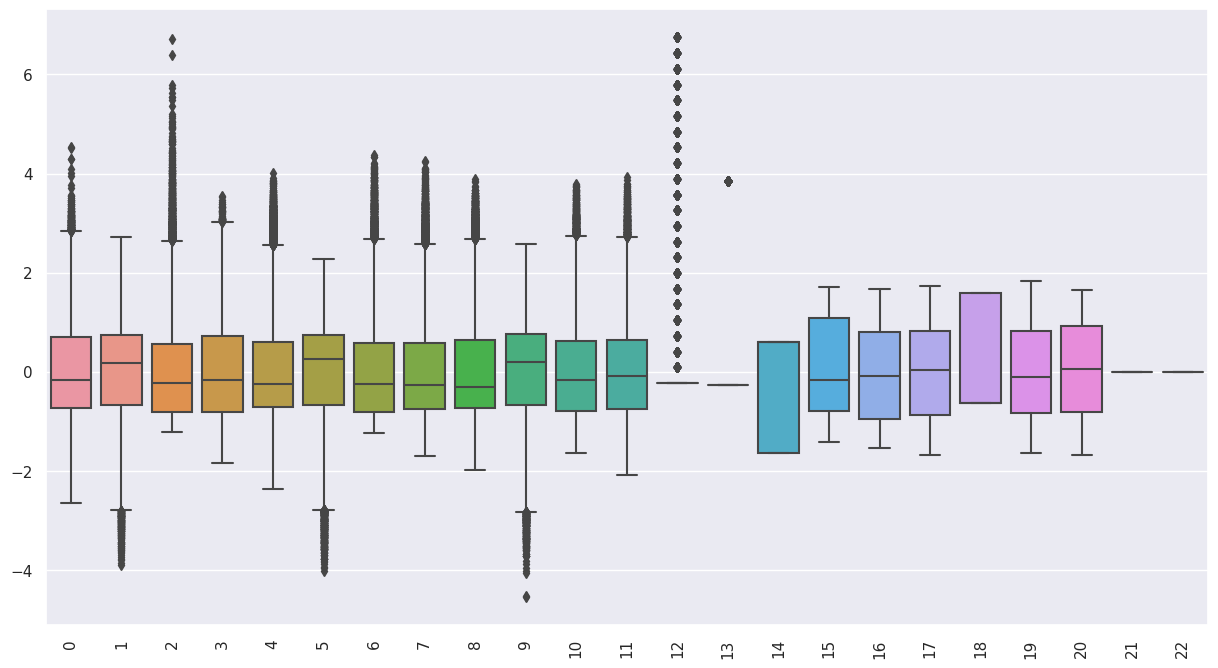

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled))
plt.xticks(rotation=90)
plt.show()


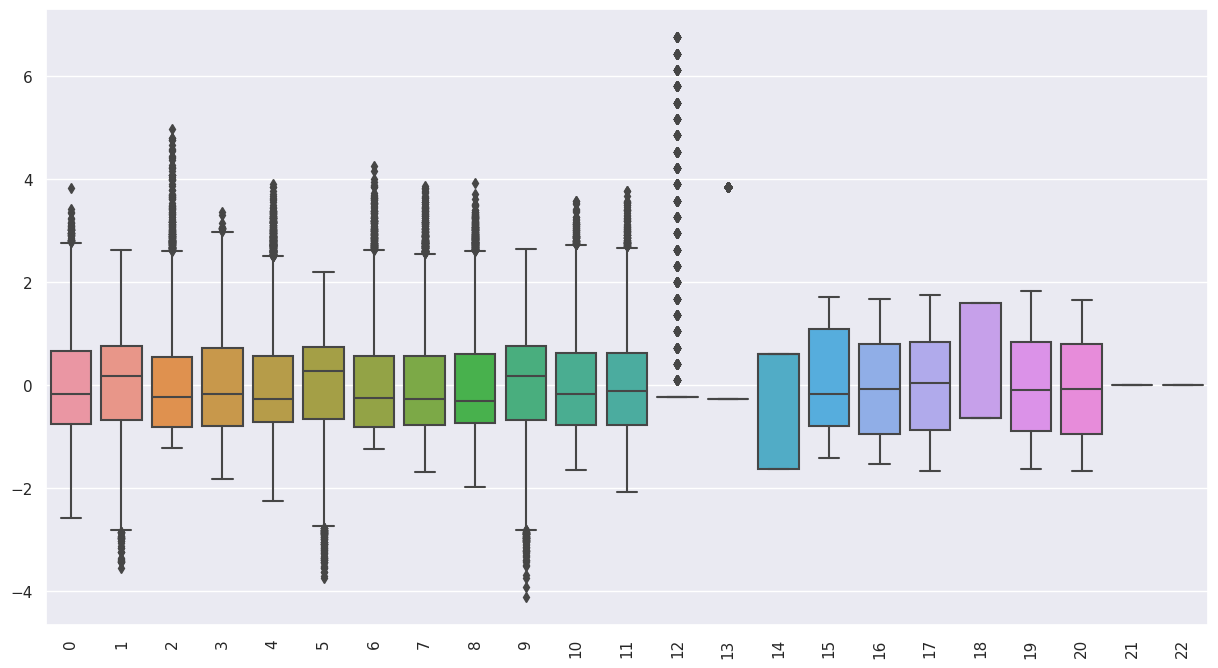

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X_test_scaled))
plt.xticks(rotation=90)
plt.show()


In [197]:
import numpy as np

# Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(X_train_scaled))
outliers_z = np.where(z_scores > 3)  # Z-score threshold can be 2.5 or 3
print("Outliers detected using Z-score method:", outliers_z)

# IQR method
Q1 = np.percentile(X_train_scaled, 25, axis=0)
Q3 = np.percentile(X_train_scaled, 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = np.where((X_train_scaled < lower_bound) | (X_train_scaled > upper_bound))
print("Outliers detected using IQR method:", outliers_iqr)


Outliers detected using Z-score method: (array([   11,    30,    41, ..., 38381, 38406, 38426]), array([13, 13, 12, ...,  9,  9, 11]))
Outliers detected using IQR method: (array([   11,    11,    30, ..., 38409, 38416, 38426]), array([12, 13, 12, ...,  8,  2, 11]))


In [198]:
# Clip using IQR bounds
X_train_scaled_clipped = np.clip(X_train_scaled, lower_bound, upper_bound)


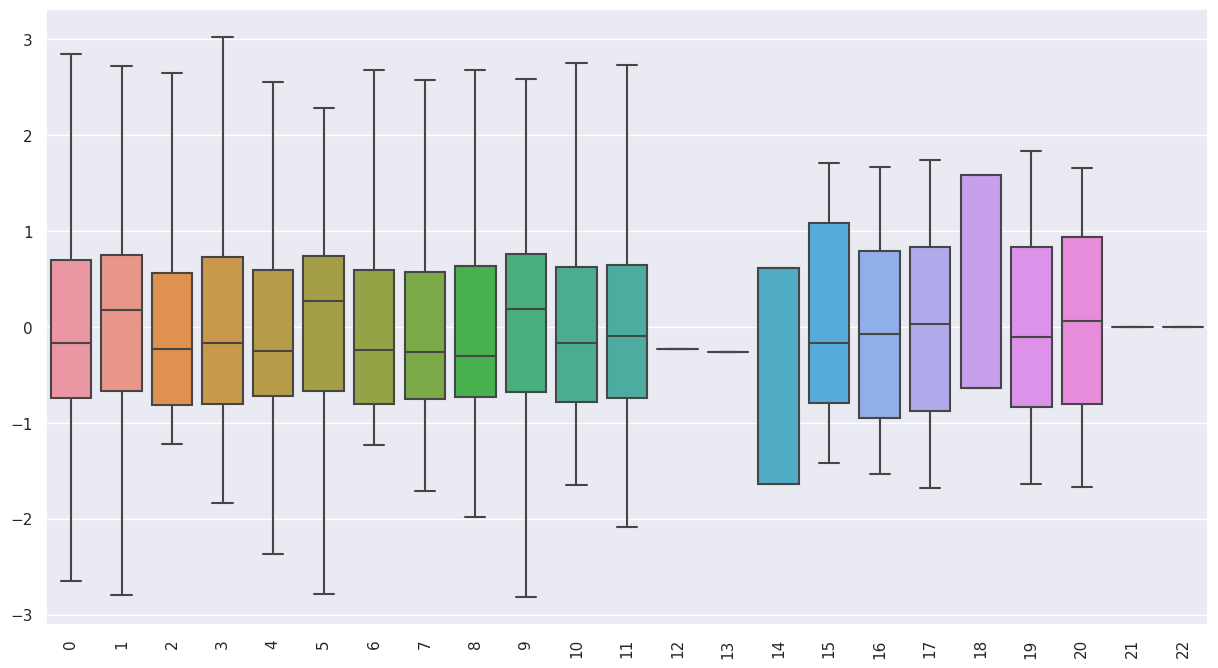

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train_scaled is a DataFrame
plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled_clipped))
plt.xticks(rotation=90)
plt.show()

In [200]:
import numpy as np

# Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(X_test_scaled))
outliers_z = np.where(z_scores > 3)  # Z-score threshold can be 2.5 or 3
print("Outliers detected using Z-score method:", outliers_z)

# IQR method
Q1 = np.percentile(X_test_scaled, 25, axis=0)
Q3 = np.percentile(X_test_scaled, 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = np.where((X_test_scaled < lower_bound) | (X_test_scaled > upper_bound))
print("Outliers detected using IQR method:", outliers_iqr)


Outliers detected using Z-score method: (array([   0,    4,   17, ..., 9601, 9606, 9608]), array([13, 13, 11, ..., 13,  2,  4]))
Outliers detected using IQR method: (array([   0,    0,    4, ..., 9608, 9608, 9608]), array([12, 13, 12, ...,  4,  5,  8]))


In [201]:
X_test_scaled_clipped=np.clip(X_test_scaled, lower_bound, upper_bound)

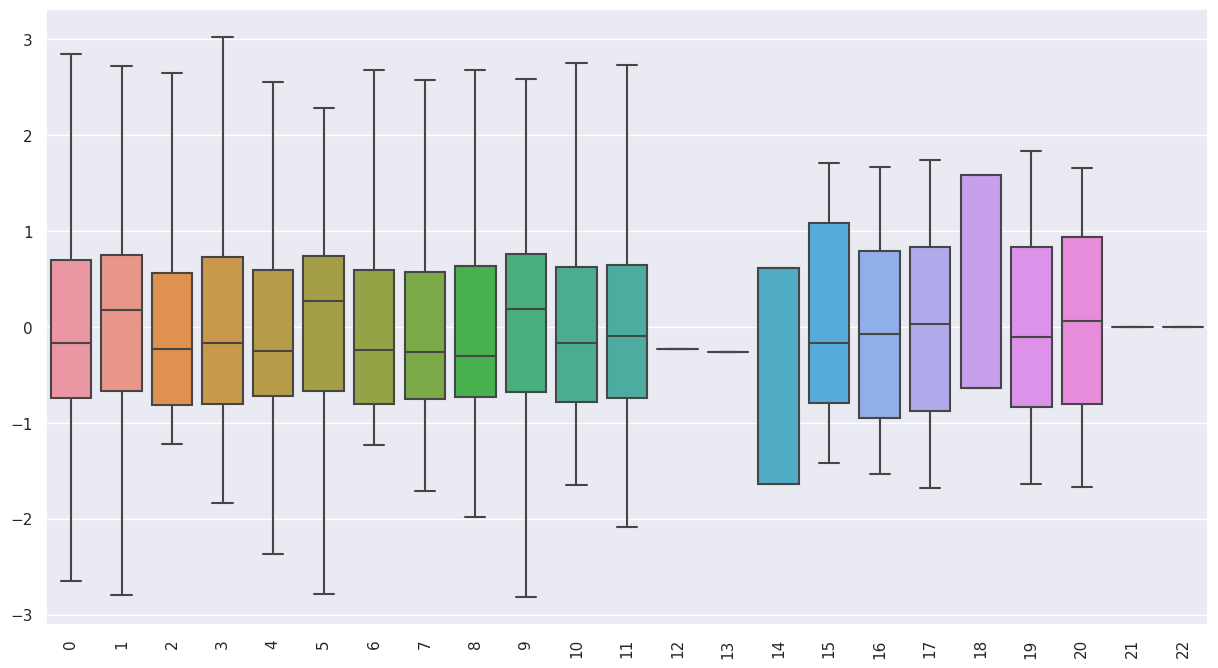

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train_scaled is a DataFrame
plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled_clipped))
plt.xticks(rotation=90)
plt.show()

In [222]:
from tensorflow import keras

hidden_units = 100

model = keras.Sequential([
  keras.layers.Dense(hidden_units, activation='selu', input_dim=23,kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)),
 
    keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)),
 
    keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)),
  
     keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)),

    
  keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mae')

In [234]:
history = model.fit(X_train_scaled_clipped, y_train, validation_data=(X_test_scaled_clipped, y_test), 
                    epochs=50, batch_size=32,)

# Evaluate the model
loss = model.evaluate(X_test_scaled_clipped, y_test)
print("Test MAE loss:", loss)


Epoch 1/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.1607 - val_loss: 29.5553
Epoch 2/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.9788 - val_loss: 29.8477
Epoch 3/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.4457 - val_loss: 30.4212
Epoch 4/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.0030 - val_loss: 30.0188
Epoch 5/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.1630 - val_loss: 29.8625
Epoch 6/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.3173 - val_loss: 29.6238
Epoch 7/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.8582 - val_loss: 29.3444
Epoch 8/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.7273 - val_loss: 29.2889
Epoch 9/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.0492 - val_loss: 29.7492
Epoch 10/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.0664 - val_loss: 29.4159
Epoch 11/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.7514 - val_loss: 30.4373
Epoch 12

In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled_clipped)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2*100)


301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error (MAE): 25.838184754005297
R-squared (R2) score: 95.8401194819328
